In [ ]:
# Used to get powerflow datasets
!pip install simbench

In [ ]:
import simbench as sb

In [ ]:
#Get grid data using grid code
grid_code = "1-HV-urban--0-sw"
net = sb.get_simbench_net(grid_code)
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

print(profiles.keys())

dict_keys([('load', 'p_mw'), ('load', 'q_mvar'), ('sgen', 'p_mw'), ('gen', 'p_mw'), ('storage', 'p_mw')])


In [ ]:
#Print the network parameters
print(net)

This pandapower network includes the following parameter tables:
   - bus (372 elements)
   - load (79 elements)
   - sgen (98 elements)
   - switch (498 elements)
   - ext_grid (1 element)
   - line (113 elements)
   - trafo (3 elements)
   - measurement (1122 elements)
   - bus_geodata (372 elements)
   - substation (14 elements)
   - loadcases (6 elements)


In [ ]:
#Getting the profiles for load and sgen
sgen_p = profiles[("sgen", "p_mw")]
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]

#One leap year time calculations (1 year and 15 minutes)
print(sgen_p)

        0    1    2    3   ...         94        95         96         97
0      0.0  0.0  0.0  0.0  ...  38.335381  8.136523  27.768684  13.942401
1      0.0  0.0  0.0  0.0  ...  38.133541  8.093683  27.622479  13.868992
2      0.0  0.0  0.0  0.0  ...  37.931701  8.050843  27.476273  13.795584
3      0.0  0.0  0.0  0.0  ...  37.729861  8.008004  27.330068  13.722176
4      0.0  0.0  0.0  0.0  ...  37.528021  7.965164  27.183863  13.648767
...    ...  ...  ...  ...  ...        ...       ...        ...        ...
35131  0.0  0.0  0.0  0.0  ...  10.828114  2.298221   7.843471   3.938135
35132  0.0  0.0  0.0  0.0  ...   0.000000  0.000000   0.000000   0.000000
35133  0.0  0.0  0.0  0.0  ...   0.000000  0.000000   0.000000   0.000000
35134  0.0  0.0  0.0  0.0  ...   0.000000  0.000000   0.000000   0.000000
35135  0.0  0.0  0.0  0.0  ...   0.000000  0.000000   0.000000   0.000000

[35136 rows x 98 columns]


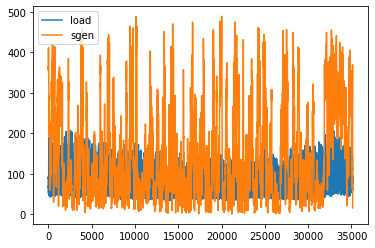

In [ ]:
#Plotting the generation and load profiles
import matplotlib.pyplot as plt
load_p.sum(axis=1).plot(label="load")
sgen_p.sum(axis=1).plot(label="sgen")
plt.legend()

In [ ]:
#Import packages from pandaspower for further analysis
import pandapower.timeseries as ts
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

In [ ]:
#Creating constant controllers for each element
ds = DFData(sgen_p)
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=sgen_p.columns, data_source=ds)
ds = DFData(load_p)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_p.columns, data_source=ds)
ds = DFData(load_q)
ConstControl(net, "load", "q_mvar", element_index=net.load.index, profile_name=load_q.columns, data_source=ds)

This ConstControl has the following parameters: 

index:             2
json_excludes:     ['self', '__class__']

In [ ]:
#Output Writer
ts.OutputWriter(net, output_path="./", output_file_type=".json")

#Run timeseries
ts.run_timeseries(net)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


Progress: |██████████████████████████████████████████████████| 100.0% Complete



In [ ]:
#Mount gdrive to save the data
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#Moving the results to gdrive
!mv /content/res_bus/vm_pu.json /content/gdrive/MyDrive/vm_pu.json
!mv /content/res_line/loading_percent.json /content/gdrive/MyDrive/loading_percent.json